In [ ]:
import numpy as np
from numpy import pi
from scipy.stats import rv_continuous

class breit_wigner_gen(rv_continuous):

    def _argcheck(self, mass, width):

        return (mass > 0) & (width > 0)

    def _pdf(self, m, mass, width):

        alpha = width / mass
        gamma = mass**2 * (1. + alpha**2)**0.5
        k = 2.**(3. / 2.) * mass**2 * alpha * gamma / (pi * (mass**2 + gamma)**0.5)

        return k / ((m**2 - mass**2)**2 + mass**4 * alpha**2)

    def _cdf(self, m, mass, width):

        alpha = width / mass
        gamma = mass**2 * (1. + alpha**2)**0.5
        k = 2.**(3. / 2.) * mass**2 * alpha * gamma / (pi * (mass**2 + gamma)**0.5)

        arg_1 = complex(-1)**(1. / 4.) / (-1j + alpha)**0.5 * m / mass
        arg_2 = complex(-1)**(3. / 4.) / (1j + alpha)**0.5 * m / mass

        shape = -1j * np.arctan(arg_1) / (-1j + alpha)**0.5 - np.arctan(arg_2) / (1j + alpha)**0.5
        norm = complex(-1)**(1. / 4.) * k / (2. * alpha * mass**3)

        cdf_ = shape * norm
        cdf_ = cdf_.real

        return cdf_


breit_wigner = breit_wigner_gen(a=0, b=np.inf, name='Breit-Wigner', shapes='mass, width')


if __name__ == "__main__":
    import doctest
    doctest.testmod()

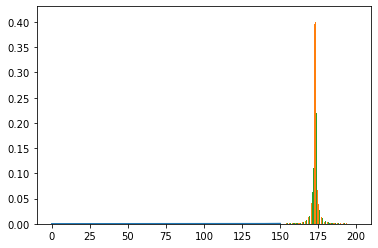

In [ ]:
import matplotlib.pyplot as plt
BW = breit_wigner(mass=173., width=1.4)
mass = np.linspace(0., 150., 200)
pdf = [BW.pdf(m) for m in mass]
pdf_plot = plt.plot(mass, pdf)

samples = BW.rvs((23556,2))
hist_plot = plt.hist(samples,density= True, bins=100, range=[150, 200])
plt.show()


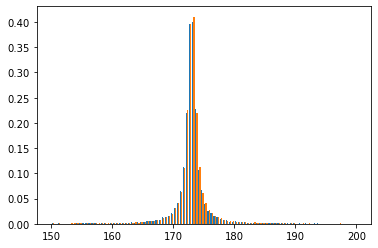

In [ ]:
hist_plot = plt.hist(samples,density= True, bins=100, range=[150, 200])


In [ ]:
samples

array([[171.08487569, 172.03333367],
       [173.06321579, 164.09075286],
       [170.52446144, 173.36647718],
       ...,
       [172.78765348, 173.32631262],
       [172.31595558, 173.04575354],
       [172.89901731, 173.34975885]])

In [ ]:
import uproot
uproot.recreate('event_gen.root')
with uproot.update('event_gen.root') as event_gen:
    event_gen['top_masses'] = {'top_masses': samples}

In [ ]:
file = uproot.open('/Users/vinayakkapoor/event_gen.root')